In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier, Pool
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
print(df.columns)

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')


In [7]:
for column in df.columns:
    if df[column].dtype=='object':
        print(df[column].value_counts())
        print("-----------------------------")

gender
Male      6228134
Female    5276664
Name: count, dtype: int64
-----------------------------
vehicle_age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64
-----------------------------
vehicle_damage
Yes    5783229
No     5721569
Name: count, dtype: int64
-----------------------------


In [8]:
df['response'].value_counts()

response
0    10089739
1     1415059
Name: count, dtype: int64

### The data is highly imbalanced so we will be needing to do SMOTING 

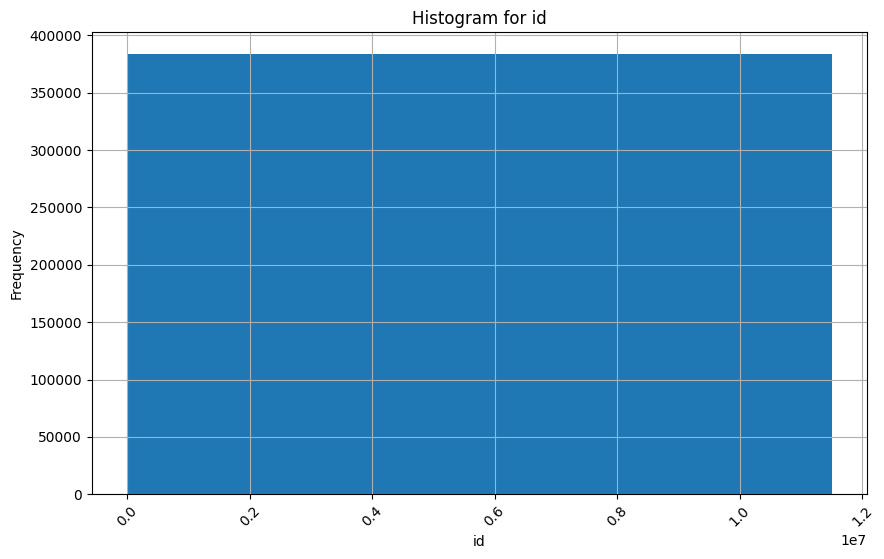

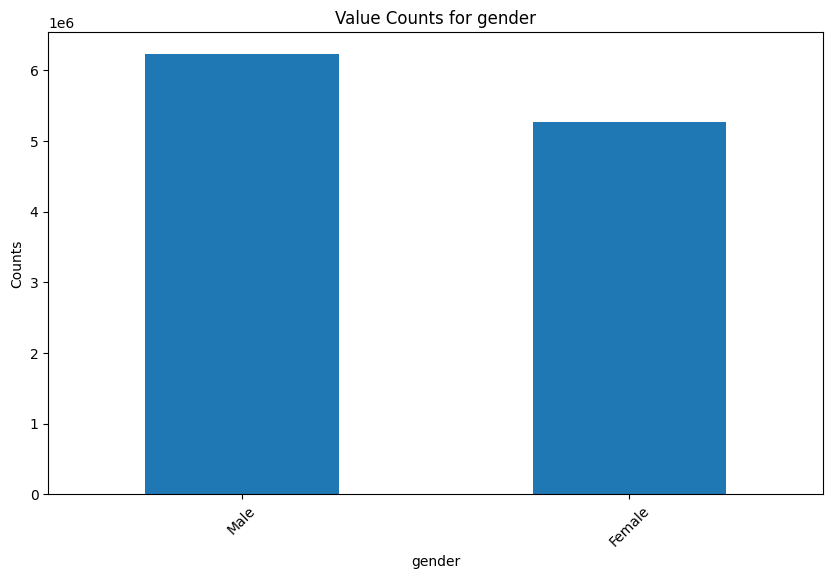

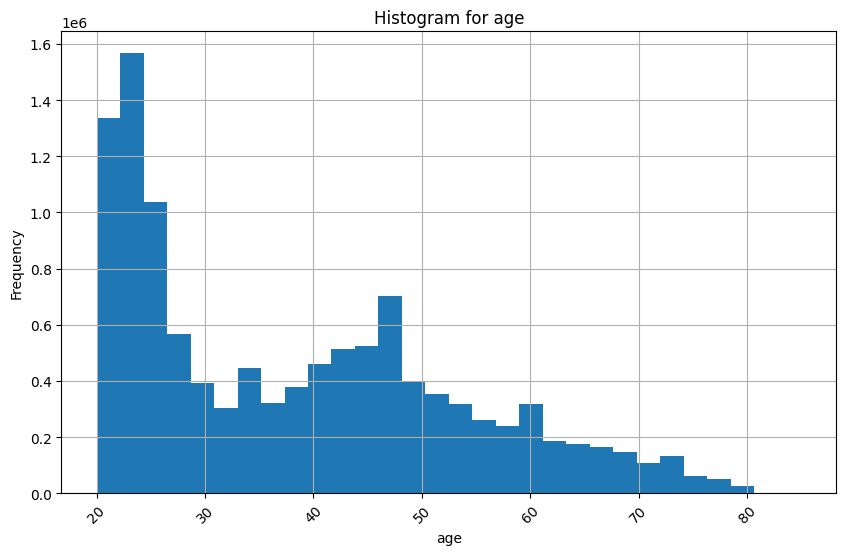

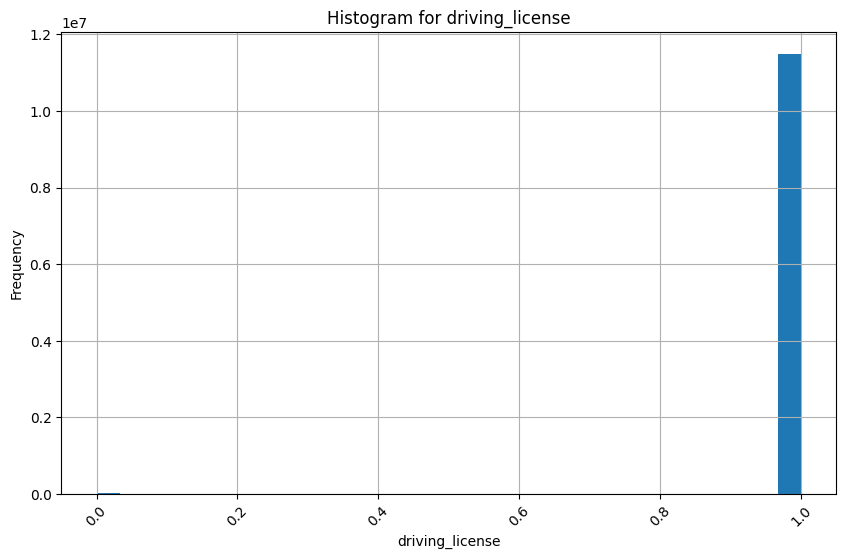

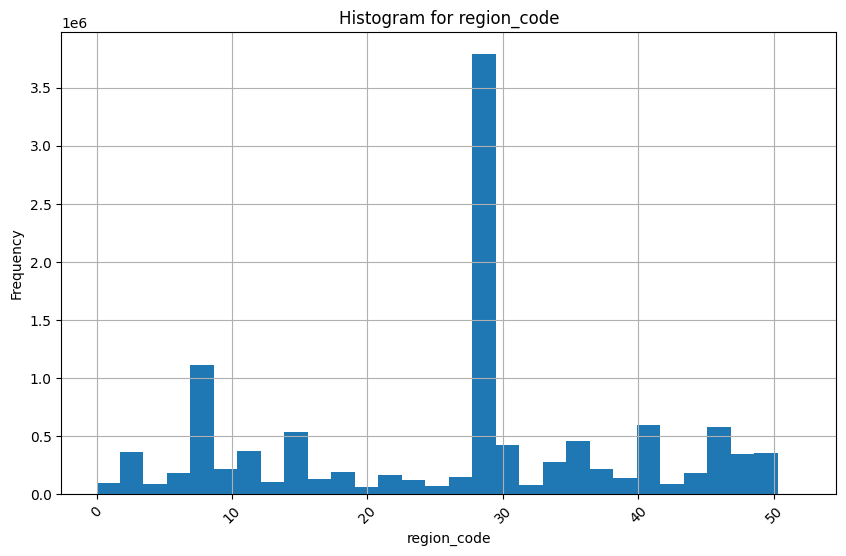

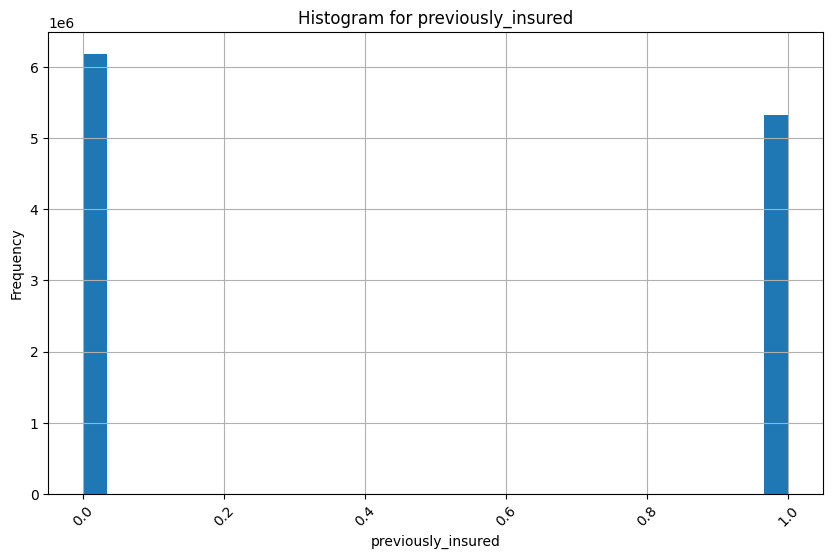

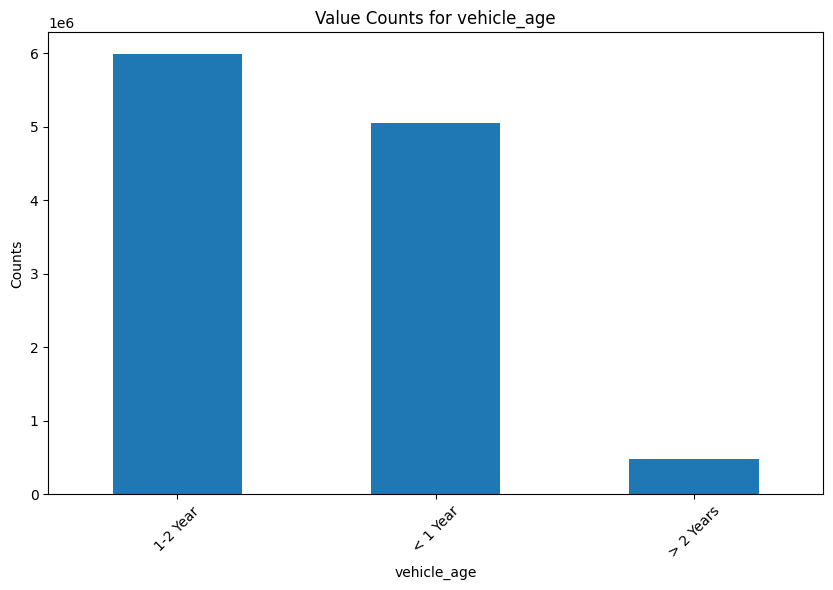

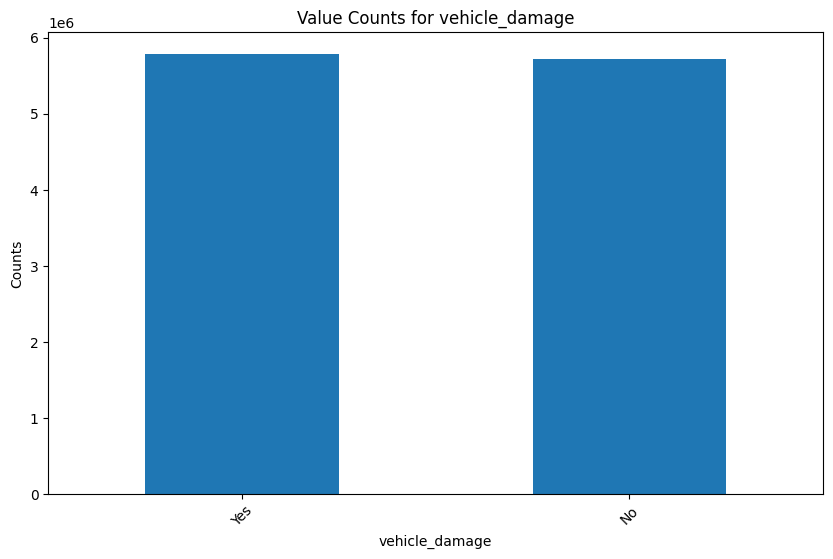

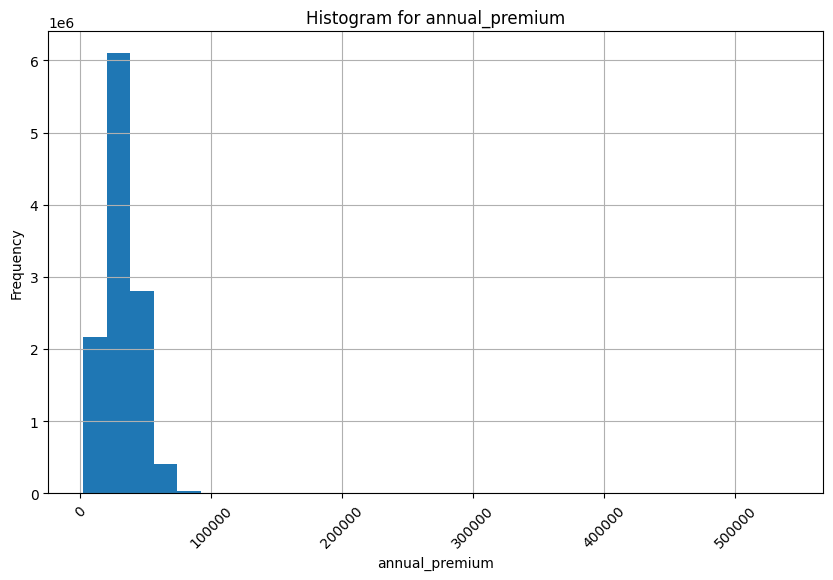

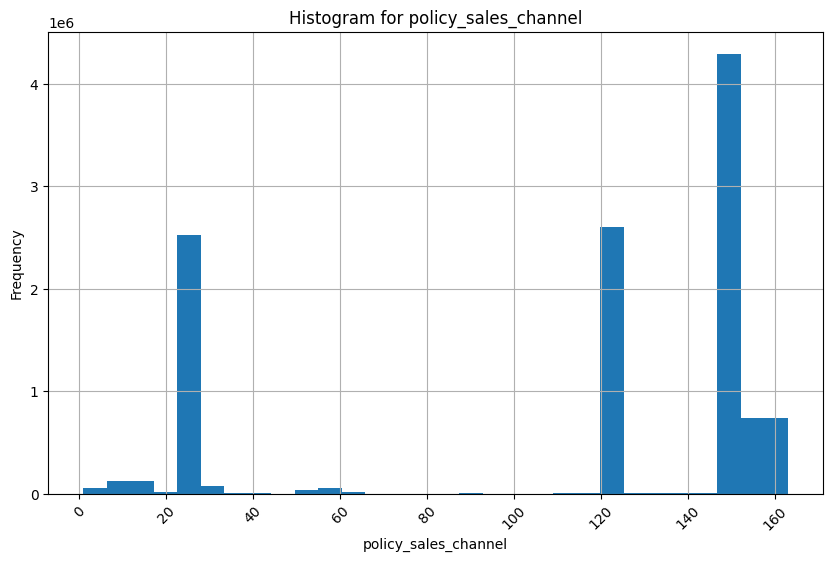

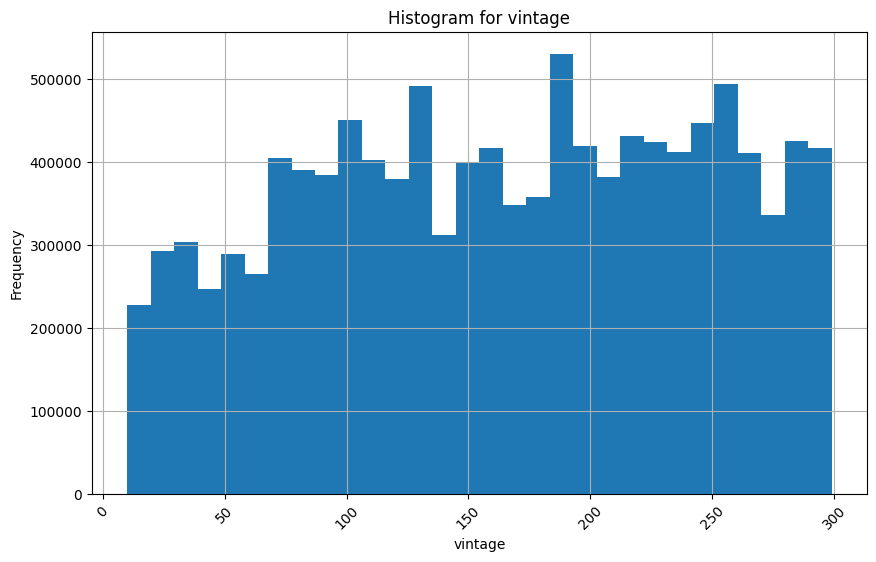

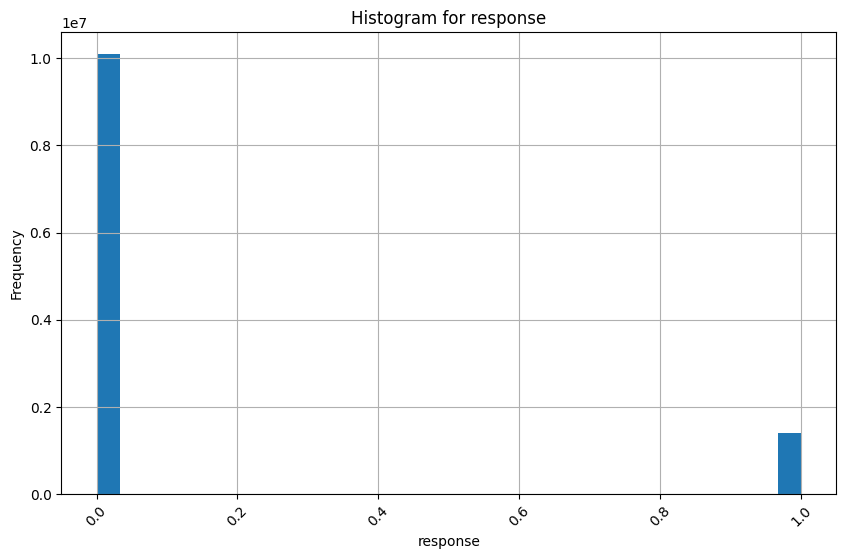

In [9]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].hist(bins=30)
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Value Counts for {column}')
        plt.xlabel(column)
        plt.ylabel('Counts')
    
    plt.xticks(rotation=45)
    plt.show()

In [10]:
df['driving_license'].value_counts()

driving_license
1    11482041
0       22757
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   gender                object 
 2   age                   int64  
 3   driving_license       int64  
 4   region_code           float64
 5   previously_insured    int64  
 6   vehicle_age           object 
 7   vehicle_damage        object 
 8   annual_premium        float64
 9   policy_sales_channel  float64
 10  vintage               int64  
 11  response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# X = df.drop(columns=['id', 'response'])
# y = df['response']

# # Categorical and numerical columns
# categorical_features = ['gender', 'vehicle_age', 'vehicle_damage']
# numerical_features = ['age', 'driving_license', 'region_code', 'previously_insured', 'annual_premium', 'policy_sales_channel', 'vintage']

# # Preprocessing pipelines for numerical and categorical features
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Column transformer to apply the transformations
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Create a pipeline with preprocessing and model
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('regressor', LinearRegression())])

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Fit the model
# model.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = model.predict(X_val)

# # Evaluate the model
# mse = mean_squared_error(y_val, y_pred)
# print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.09141358183370665


In [22]:
# test_df = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')  # Replace with your actual test file path

# test_df.columns = test_df.columns.str.replace(' ', '_').str.lower()

# # Preprocess the test dataset
# test_ids = test_df['id']
# X_test = test_df.drop(columns=['id'])
# print("2")
# # Predict the response for the test dataset
# test_predictions = model.predict(X_test)

# # Create a submission DataFrame
# submission = pd.DataFrame({'id': test_ids, 'Response': test_predictions})
# print("3")
# # Save the submission to a CSV file
# submission.to_csv('submission_linear_regression.csv', index=False)

# print("Submission file saved as submission_linear_regression.csv")

2
3
Submission file saved as submission_linear_regression.csv


0.83 :score for the above linear regression model 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings



2024-07-01 22:07:53.587294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 22:07:53.587407: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 22:07:53.706741: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [26]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Define features and target
X = df.drop(columns=['id', 'response'])
y = df['response']

# Categorical and numerical columns
categorical_features = ['gender', 'vehicle_age', 'vehicle_damage']
numerical_features = ['age', 'driving_license', 'region_code', 'previously_insured', 'annual_premium', 'policy_sales_channel', 'vintage']

# Preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Epoch 1/20
   103/287620 ━━━━━━━━━━━━━━━━━━━━ 7:05 1ms/step - accuracy: 0.8554 - loss: 0.4063

I0000 00:00:1719871721.829586     354 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 51887/287620 ━━━━━━━━━━━━━━━━━━━━ 5:33 1ms/step - accuracy: 0.8764 - loss: 0.2737

KeyboardInterrupt: 

In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {accuracy:.4f}')

# Load the test dataset
test_df = pd.read_csv('test.csv')  # Replace with your actual test file path

# Rename columns by replacing spaces with underscores and converting to lowercase
test_df.columns = test_df.columns.str.replace(' ', '_').str.lower()

# Apply preprocessing to the test dataset
X_test = preprocessor.transform(test_df.drop(columns=['id']))

# Predict on the test dataset
test_predictions = model.predict(X_test).flatten()

# Create a submission DataFrame
submission = pd.DataFrame({'id': test_df['id'], 'response': test_predictions})

# Save the submission to a CSV file
submission.to_csv('submission_deep_learning.csv', index=False)

print("Submission file saved as submission_deep_learning.csv")

Epoch 1/5
143810/143810 ━━━━━━━━━━━━━━━━━━━━ 252s 2ms/step - accuracy: 0.8771 - loss: 0.2681 - val_accuracy: 0.8770 - val_loss: 0.2660
Epoch 2/5
143810/143810 ━━━━━━━━━━━━━━━━━━━━ 245s 2ms/step - accuracy: 0.8769 - loss: 0.2679 - val_accuracy: 0.8770 - val_loss: 0.2658
Epoch 3/5
 94827/143810 ━━━━━━━━━━━━━━━━━━━━ 1:10 1ms/step - accuracy: 0.8769 - loss: 0.2682

KeyboardInterrupt: 

In [28]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 0.8770
  3264/239684 ━━━━━━━━━━━━━━━━━━━━ 4:23 1ms/step

KeyboardInterrupt: 

In [29]:

# Load the test dataset
test_df = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')  # Replace with your actual test file path

# Rename columns by replacing spaces with underscores and converting to lowercase
test_df.columns = test_df.columns.str.replace(' ', '_').str.lower()

# Apply preprocessing to the test dataset
X_test = preprocessor.transform(test_df.drop(columns=['id']))

# Predict on the test dataset
test_predictions = model.predict(X_test).flatten()



239684/239684 ━━━━━━━━━━━━━━━━━━━━ 271s 1ms/step


KeyboardInterrupt: 

In [30]:
# Create a submission DataFrame
submission = pd.DataFrame({'id': test_df['id'], 'Response': test_predictions})
print("1")
# Save the submission to a CSV file
submission.to_csv('submission_deep_learning.csv', index=False)

print("Submission file saved as submission_deep_learning.csv")

1
Submission file saved as submission_deep_learning.csv
